In [6]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("../data_ks/df_checkpoint_4.csv")
df

,Unnamed: 0,queries,answers,functions,arguments,callable,generated_responses,reverse_queries,mean_cosine_similarity
0,0,What's the weather forecast for a snowy day in...,"{""function"": ""get_weather_info"", ""arguments"": ...",get_weather_info,"{""city"": ""Juneau""}","{""city"": ""Juneau"", ""time_in_PST"": ""2024-10-24 ...","The given information is for a sunny day, not ...","[""What are the chances of a sunny day?"", ""Is t...",0.155611
1,1,"Is it sunny today in PST in Bangor, Maine?","{""function"": ""get_weather_info"", ""arguments"": ...",get_weather_info,"{""city"": ""Bangor""}","{""city"": ""Bangor"", ""time_in_PST"": ""2024-10-24 ...","No, it's windy in Bangor, Maine, with a temper...","[""What is the weather like in Bangor, Maine?"",...",0.693055
2,2,Current time and weather info in Kuching,"{""function"": ""get_weather_info"", ""arguments"": ...",get_weather_info,"{""city"": ""Kuching""}","{""city"": ""Kuching"", ""time_in_PST"": ""2024-10-24...",It's currently 2024-10-24 21:04:07 in Kuching....,"[""What is the current weather like in Kuching?...",0.641423
3,3,Can you give me an update on the weather in In...,"{""function"": ""get_weather_info"", ""arguments"": ...",get_weather_info,"{""city"": ""Indianapolis""}","{""city"": ""Indianapolis"", ""time_in_PST"": ""2024-...",It's currently cloudy in Indianapolis with a t...,"[""What is the current weather condition in Ind...",0.723904
4,4,What is the time and temperature like right no...,"{""function"": ""get_weather_info"", ""arguments"": ...",get_weather_info,"{""city"": ""Funafuti""}","{""city"": ""Funafuti"", ""time_in_PST"": ""2024-10-2...",It's currently 2024-10-24 21:04:07 PST in Funa...,"[""What is the current weather like in Funafuti...",0.831115
...,...,...,...,...,...,...,...,...,...
1675,1675,What is the area of a rectangle with length 7....,"{""function"": ""calculate_area"", ""arguments"": {""...",calculate_area,"{""length"": ""7.899"", ""width"": ""8"", ""round_resul...","{""area"": ""63""}","To find the area, multiply length and width: 7...","[""What is the formula to calculate the area of...",0.530780
1676,1676,What is the area of a square with length 2.615...,"{""function"": ""calculate_area"", ""arguments"": {""...",calculate_area,"{""length"": ""2.615"", ""width"": ""8"", ""round_resul...","{""area"": ""21""}","To find the area, multiply the length and widt...","[""What is the formula to find the area of a re...",0.483502
1677,1677,Calculate the area of a square with length 8.9...,"{""function"": ""calculate_area"", ""arguments"": {""...",calculate_area,"{""length"": ""8.901"", ""width"": ""None"", ""round_re...","{""error"": ""Width must be a number.""}",Area = side² = 8.901² ≈ 79.3 (rounded to the n...,"[""What is the area of a square with a side len...",0.714530
1678,1678,What is the area of a rectangle with length 5....,"{""function"": ""calculate_area"", ""arguments"": {""...",calculate_area,"{""length"": ""5.005"", ""width"": ""8"", ""round_resul...","{""area"": ""40""}","To find the area, multiply length and width: 5...","[""What is the formula to calculate the area of...",0.546567


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'get_weather_info'),
  Text(1, 0, 'power'),
  Text(2, 0, 'get_capital'),
  Text(3, 0, 'calculate_trip_cost'),
  Text(4, 0, 'count_letter'),
  Text(5, 0, 'calculate_bmi'),
  Text(6, 0, 'get_timezone'),
  Text(7, 0, 'calculate_area')])

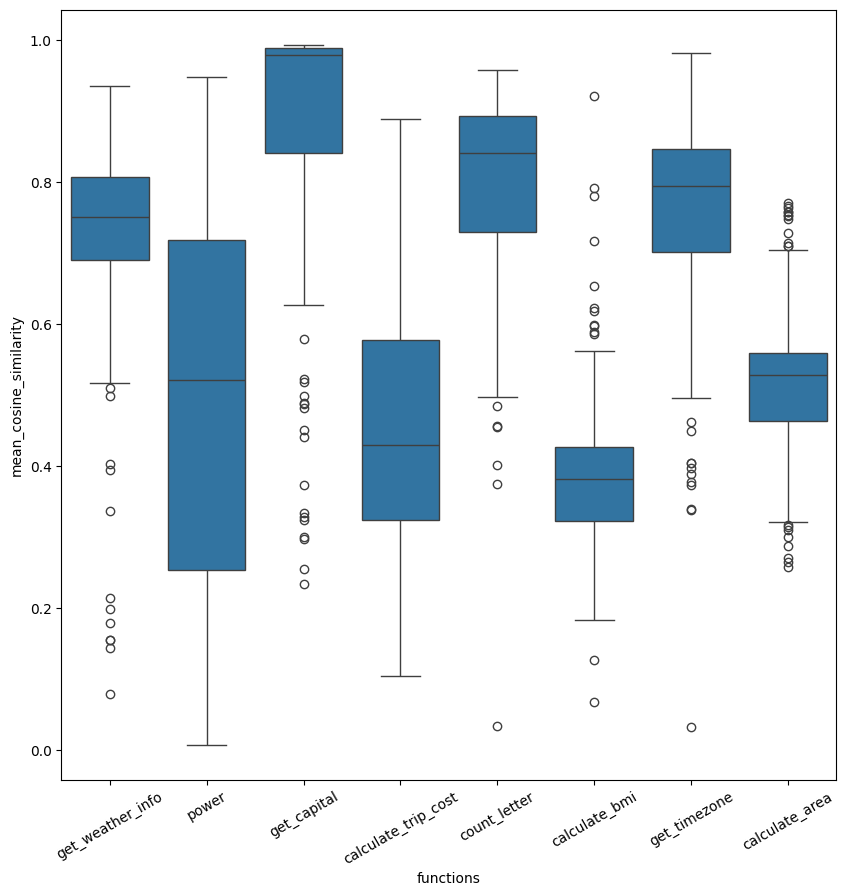

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.boxplot(data=df, x="functions", y="mean_cosine_similarity", ax=ax)
plt.xticks(rotation=30)

In [32]:
# get_capital has the highest average. Would like to see 
lowest = df[df["functions"] == "get_capital"].sort_values("mean_cosine_similarity").iloc[0,:]
print(lowest["queries"], '\n', '\n', lowest['reverse_queries'])
lowest["answers"]


In what country is the capital city Basseterre 
 
 ["What is the capital of Saint Kitts and Nevis?", "What is the capital city of Saint Kitts and Nevis?", "What city serves as the capital of Saint Kitts and Nevis?"]


'{"function": "get_capital", "arguments": {"country": "Saint Kitts and Nevis"}}'

In [40]:
#calculate_bmi is the worse
lowest = df[df["functions"] == "calculate_bmi"].sort_values("mean_cosine_similarity").iloc[200,:]

for item in lowest.index:
    print(lowest[item])

1230
What is my BMI when I weigh 83 kg and am 285 cm tall as a female at the age of 33
{"function": "calculate_bmi", "arguments": {"weight": "83", "height": "285", "age": "33", "gender": "female"}}
calculate_bmi
{"weight": "83", "height": "285", "age": "33", "gender": "female"}
{"bmi": 10.22, "category": "Underweight", "recommendation": "You may need to gain weight. Consult a healthcare provider.", "age": 33.0, "gender": "female"}
To calculate BMI, divide weight (83 kg) by height (285 cm) squared. BMI = 83 / (285^2) = 10.22.
["What is the formula to calculate BMI?", "What is the BMI if the weight is 83 kg and height is 285 cm?", "How do you calculate BMI from weight and height?"]
0.5886628115799871
